# Human Activity Recognition from Wearable Inertial Sensor Networks Part 3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Table of Contents

- [Import library and define visualization parameters](#Import-library-and-define-visualization-parameters)
- [Declaration of functions used](#Declaration-of-functions-used)
- [Import data](#Import-data)
- [Data exploration and visualization](#Data-exploration-and-visualization)
- [Save data in pickle format in google drive](#Save-data-in-pickle-format-in-google-drive)


# Import library and define visualization parameters

In [ ]:
from __future__ import print_function
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
%matplotlib inline
from math import pi
import numpy as np
import pandas as pd
from pandas import DataFrame
from typing import List
import seaborn as sns
from scipy import stats

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import warnings 
warnings.filterwarnings('ignore')

# Display several outputs on a notebook output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Define certain standard parameters at the outset
pd.options.display.float_format = '{: .4f}'. format
np.set_printoptions(precision=4)
plt.style.use ('ggplot')
# Files
path_to_file = '/content/drive/MyDrive/myproject/outputdata'

# Declaration of functions used

In [ ]:
# Define a function to map the values 
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 

# Import data

In [ ]:
!cp /content/drive/MyDrive/myproject/outputdata/df_2.pkl /tmp/df_2.pkl

In [ ]:
df = pd.read_pickle('/tmp/df_2.pkl')
df = df.reset_index(drop=True)
df['index'] = df.index
df

,act,filename,acc_rf_x_amin,acc_rf_x_amax,acc_rf_x_mean,acc_rf_x_median,acc_rf_x_std,acc_rf_x_skew,acc_rf_x_kurtosis,acc_rf_x_iqr,acc_rf_x_median_absolute_deviation,acc_rf_x_mad,acc_rf_x_ran,acc_rf_y_amin,acc_rf_y_amax,acc_rf_y_mean,acc_rf_y_median,acc_rf_y_std,acc_rf_y_skew,acc_rf_y_kurtosis,acc_rf_y_iqr,acc_rf_y_median_absolute_deviation,acc_rf_y_mad,acc_rf_y_ran,acc_rf_z_amin,acc_rf_z_amax,acc_rf_z_mean,acc_rf_z_median,acc_rf_z_std,acc_rf_z_skew,acc_rf_z_kurtosis,acc_rf_z_iqr,acc_rf_z_median_absolute_deviation,acc_rf_z_mad,acc_rf_z_ran,gyro_rf_x_amin,gyro_rf_x_amax,gyro_rf_x_mean,gyro_rf_x_median,gyro_rf_x_std,...,long_acc_skew,long_acc_kurtosis,long_acc_iqr,long_acc_median_absolute_deviation,long_acc_mad,long_acc_ran,gyro_norm_amin,gyro_norm_amax,gyro_norm_mean,gyro_norm_median,gyro_norm_std,gyro_norm_skew,gyro_norm_kurtosis,gyro_norm_iqr,gyro_norm_median_absolute_deviation,gyro_norm_mad,gyro_norm_ran,colat_gyro_amin,colat_gyro_amax,colat_gyro_mean,colat_gyro_median,colat_gyro_std,colat_gyro_skew,colat_gyro_kurtosis,colat_gyro_iqr,colat_gyro_median_absolute_deviation,colat_gyro_mad,colat_gyro_ran,long_gyro_amin,long_gyro_amax,long_gyro_mean,long_gyro_median,long_gyro_std,long_gyro_skew,long_gyro_kurtosis,long_gyro_iqr,long_gyro_median_absolute_deviation,long_gyro_mad,long_gyro_ran,index
0,9,/content/drive/MyDrive/myproject/data/HuGaDB_v...,-26828.0000,228.0000,-14573.2955,-15614.0000,5793.7028,0.1629,-0.8552,9196.0000,6473.0316,4944.5560,27056.0000,-5964.0000,8844.0000,1925.3182,1846.0000,2520.9770,-0.1507,0.2721,3458.0000,2748.7404,1996.3631,14808.0000,-716.0000,17512.0000,6885.6818,6854.0000,3032.2412,0.4930,0.7177,3854.0000,2873.2788,2349.0573,18228.0000,-7436.0000,7932.0000,-573.8693,-512.5000,4063.0418,...,-1.3142,-0.2451,0.4017,0.1865,2.0664,6.2716,945.3571,23264.5105,10310.5263,10026.8826,5410.1511,0.2343,-0.7897,8611.3435,6434.9378,4575.3236,22319.1535,0.7905,2.4534,1.5761,1.7191,0.3832,0.0089,-1.2411,0.6793,0.5010,0.3500,1.6628,-2.7910,3.0252,-0.1613,0.9271,1.7209,-0.1405,-1.7772,3.2849,1.2820,1.6712,5.8162,0
1,9,/content/drive/MyDrive/myproject/data/HuGaDB_v...,-32768.0000,2744.0000,-15908.3182,-17936.0000,8476.0718,0.2310,-1.0835,13653.0000,10247.7312,7440.2546,35512.0000,-7160.0000,11156.0000,1906.0909,2280.0000,3006.8416,-0.2840,0.3281,3892.0000,2653.8540,2344.5134,18316.0000,-2660.0000,16468.0000,6917.0682,7444.0000,4221.9786,-0.3141,-0.6804,5915.0000,4581.2340,3497.1772,19128.0000,-8612.0000,6710.0000,-724.3693,-1421.5000,4409.9493,...,-1.1491,-0.6286,2.5134,0.2027,2.1566,6.2694,1842.2904,26660.7860,13272.7228,13334.5933,6810.6574,0.0467,-1.1338,11651.8404,8842.4359,5783.4449,24818.4956,0.5558,2.3396,1.5991,1.8195,0.4306,-0.1726,-1.4494,0.7665,0.5667,0.4046,1.7838,-2.7197,2.5692,-0.4510,-1.7267,1.6603,0.1622,-1.8353,3.2286,1.0716,1.6168,5.2889,1
2,9,/content/drive/MyDrive/myproject/data/HuGaDB_v...,-30940.0000,1836.0000,-16694.3182,-18150.0000,8272.1209,0.4232,-0.8617,13774.0000,9230.6676,7004.7557,32776.0000,-6472.0000,8020.0000,1933.4773,2478.0000,2786.0552,-0.3112,-0.3191,3741.0000,2745.7752,2283.8549,14492.0000,-3380.0000,14924.0000,6404.4545,7276.0000,3980.7550,-0.4040,-0.7550,6252.0000,4237.2708,3361.0393,18304.0000,-8296.0000,6519.0000,333.5682,678.5000,3950.7688,...,-1.1666,-0.5756,2.2976,0.1884,2.1428,6.2821,1013.4639,25378.0033,12059.3191,12647.7960,6183.3921,0.0505,-0.9531,9699.8500,7468.2433,5196.0901,24364.5394,0.7882,2.5435,1.5631,1.4746,0.4225,0.2112,-1.2869,0.7831,0.5797,0.3847,1.7553,-2.9461,2.7416,-0.0474,1.0783,1.6228,-0.2627,-1.7239,3.2073,0.7663,1.5615,5.6877,2
3,9,/content/drive/MyDrive/myproject/data/HuGaDB_v...,-27988.0000,100.0000,-14594.7045,-15108.0000,7188.4512,0.0694,-1.1602,12289.0000,9310.7280,6313.0522,28088.0000,-4552.0000,9284.0000,1653.3409,1506.0000,2464.6819,0.0466,-0.1943,3227.0000,2378.0904,1963.5834,13836.0000,-1880.0000,11880.0000,5811.5455,6510.0000,3210.8786,-0.3152,-0.9499,5090.0000,3641.2656,2741.2789,13760.0000,-8277.0000,6905.0000,-656.3295,-1238.5000,3933.6015,

In [ ]:
event_dictionary = {1 : 'Walking', 2 : 'Running', 3 : 'Going up', 4 : 'Going down', 5 : 'Sitting', 6 : 'Sitting down', 7 : 'Standing up', 8 : 'Standing', 9 : 'Bicycling', 10 : 'Up by elevator', 11 : 'Down by elevator', 12 : 'Sitting in car'} 
df['activity'] = df['act'].apply(set_value, args =(event_dictionary, ))
df['person'] = df['filename'].str.split('_').str[-2:].str.join('_').str.split('.').str[0].astype(str).str[0:2]
df

,act,filename,acc_rf_x_amin,acc_rf_x_amax,acc_rf_x_mean,acc_rf_x_median,acc_rf_x_std,acc_rf_x_skew,acc_rf_x_kurtosis,acc_rf_x_iqr,acc_rf_x_median_absolute_deviation,acc_rf_x_mad,acc_rf_x_ran,acc_rf_y_amin,acc_rf_y_amax,acc_rf_y_mean,acc_rf_y_median,acc_rf_y_std,acc_rf_y_skew,acc_rf_y_kurtosis,acc_rf_y_iqr,acc_rf_y_median_absolute_deviation,acc_rf_y_mad,acc_rf_y_ran,acc_rf_z_amin,acc_rf_z_amax,acc_rf_z_mean,acc_rf_z_median,acc_rf_z_std,acc_rf_z_skew,acc_rf_z_kurtosis,acc_rf_z_iqr,acc_rf_z_median_absolute_deviation,acc_rf_z_mad,acc_rf_z_ran,gyro_rf_x_amin,gyro_rf_x_amax,gyro_rf_x_mean,gyro_rf_x_median,gyro_rf_x_std,...,long_acc_iqr,long_acc_median_absolute_deviation,long_acc_mad,long_acc_ran,gyro_norm_amin,gyro_norm_amax,gyro_norm_mean,gyro_norm_median,gyro_norm_std,gyro_norm_skew,gyro_norm_kurtosis,gyro_norm_iqr,gyro_norm_median_absolute_deviation,gyro_norm_mad,gyro_norm_ran,colat_gyro_amin,colat_gyro_amax,colat_gyro_mean,colat_gyro_median,colat_gyro_std,colat_gyro_skew,colat_gyro_kurtosis,colat_gyro_iqr,colat_gyro_median_absolute_deviation,colat_gyro_mad,colat_gyro_ran,long_gyro_amin,long_gyro_amax,long_gyro_mean,long_gyro_median,long_gyro_std,long_gyro_skew,long_gyro_kurtosis,long_gyro_iqr,long_gyro_median_absolute_deviation,long_gyro_mad,long_gyro_ran,index,activity,person
0,9,/content/drive/MyDrive/myproject/data/HuGaDB_v...,-26828.0000,228.0000,-14573.2955,-15614.0000,5793.7028,0.1629,-0.8552,9196.0000,6473.0316,4944.5560,27056.0000,-5964.0000,8844.0000,1925.3182,1846.0000,2520.9770,-0.1507,0.2721,3458.0000,2748.7404,1996.3631,14808.0000,-716.0000,17512.0000,6885.6818,6854.0000,3032.2412,0.4930,0.7177,3854.0000,2873.2788,2349.0573,18228.0000,-7436.0000,7932.0000,-573.8693,-512.5000,4063.0418,...,0.4017,0.1865,2.0664,6.2716,945.3571,23264.5105,10310.5263,10026.8826,5410.1511,0.2343,-0.7897,8611.3435,6434.9378,4575.3236,22319.1535,0.7905,2.4534,1.5761,1.7191,0.3832,0.0089,-1.2411,0.6793,0.5010,0.3500,1.6628,-2.7910,3.0252,-0.1613,0.9271,1.7209,-0.1405,-1.7772,3.2849,1.2820,1.6712,5.8162,0,Bicycling,01
1,9,/content/drive/MyDrive/myproject/data/HuGaDB_v...,-32768.0000,2744.0000,-15908.3182,-17936.0000,8476.0718,0.2310,-1.0835,13653.0000,10247.7312,7440.2546,35512.0000,-7160.0000,11156.0000,1906.0909,2280.0000,3006.8416,-0.2840,0.3281,3892.0000,2653.8540,2344.5134,18316.0000,-2660.0000,16468.0000,6917.0682,7444.0000,4221.9786,-0.3141,-0.6804,5915.0000,4581.2340,3497.1772,19128.0000,-8612.0000,6710.0000,-724.3693,-1421.5000,4409.9493,...,2.5134,0.2027,2.1566,6.2694,1842.2904,26660.7860,13272.7228,13334.5933,6810.6574,0.0467,-1.1338,11651.8404,8842.4359,5783.4449,24818.4956,0.5558,2.3396,1.5991,1.8195,0.4306,-0.1726,-1.4494,0.7665,0.5667,0.4046,1.7838,-2.7197,2.5692,-0.4510,-1.7267,1.6603,0.1622,-1.8353,3.2286,1.0716,1.6168,5.2889,1,Bicycling,01
2,9,/content/drive/MyDrive/myproject/data/HuGaDB_v...,-30940.0000,1836.0000,-16694.3182,-18150.0000,8272.1209,0.4232,-0.8617,13774.0000,9230.6676,7004.7557,32776.0000,-6472.0000,8020.0000,1933.4773,2478.0000,2786.0552,-0.3112,-0.3191,3741.0000,2745.7752,2283.8549,14492.0000,-3380.0000,14924.0000,6404.4545,7276.0000,3980.7550,-0.4040,-0.7550,6252.0000,4237.2708,3361.0393,18304.0000,-8296.0000,6519.0000,333.5682,678.5000,3950.7688,...,2.2976,0.1884,2.1428,6.2821,1013.4639,25378.0033,12059.3191,12647.7960,6183.3921,0.0505,-0.9531,9699.8500,7468.2433,5196.0901,24364.5394,0.7882,2.5435,1.5631,1.4746,0.4225,0.2112,-1.2869,0.7831,0.5797,0.3847,1.7553,-2.9461,2.7416,-0.0474,1.0783,1.6228,-0.2627,-1.7239,3.2073,0.7663,1.5615,5.6877,2,Bicycling,01
3,9,/content/drive/MyDrive/myproject/data/HuGaDB_v...,-27988.0000,100.0000,-14594.7045,-15108.0000,7188.4512,0.0694,-1.1602,12289.0000,9310.7280,6313.0522,28088.0000,-4552.0000,9284.0000,1653.3409,1506.0000,2464.6819,0.0466,-0.1943,3227.0000,2378.0904,1963.5834,13836.0000,-1880.0000,11880.0000,5811.5455,6510.0000,3210.8786,-0.3152,-0.9499,5090.0000,3641.2656,2741.2789,13760.0000,-8277.0000,6905.0000,-656.3295,-1238.5000,3933.6015,...,0.7448,0.2751,2.1651,

# Data exploration and visualization

## Analysing Static and Dynamic activity

In [ ]:
set(df.activity.to_list())

{'Bicycling',
 'Down by elevator',
 'Going down',
 'Going up',
 'Running',
 'Sitting',
 'Sitting down',
 'Sitting in car',
 'Standing',
 'Standing up',
 'Up by elevator',
 'Walking'}

**Analyse Static and dynamic activities** :

* *Down by elevator*, *Sitting* , *Sitting down*, *Sitting in car*, *Standing*, *Standing up* and *Up by elevator* can be considered as static activities with no motion involved

* *Bicycling*, *Going down*, *Going up*, *Running* and *Walking* can be considered as dynamic activities with significant amount of motion involved

### By accelero mean features

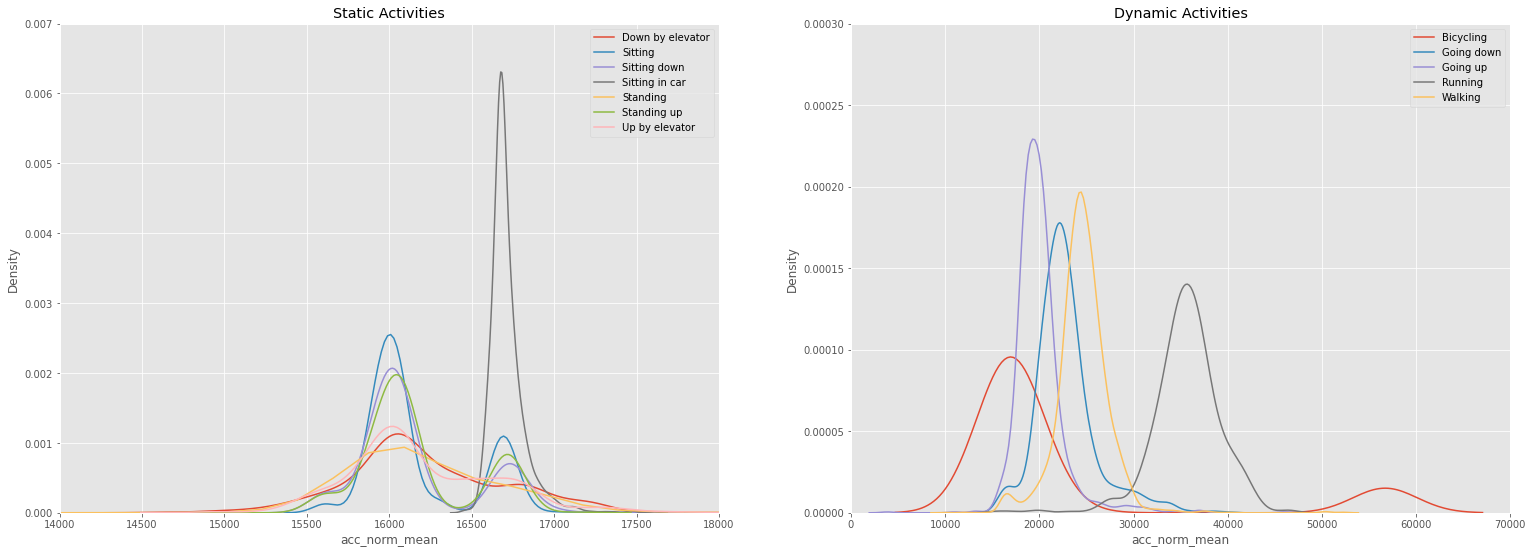

In [ ]:
plt.figure(figsize=(26,9))
plt.subplot(1,2,1)
plt.title("Static Activities")
sns.distplot(df[df["activity"]=="Down by elevator"]['acc_norm_mean'], hist = False, label = 'Down by elevator')
sns.distplot(df[df["activity"]=="Sitting"]['acc_norm_mean'], hist = False, label = 'Sitting')
sns.distplot(df[df["activity"]=="Sitting down"]['acc_norm_mean'], hist = False, label = 'Sitting down')
sns.distplot(df[df["activity"]=="Sitting in car"]['acc_norm_mean'], hist = False, label = 'Sitting in car')
sns.distplot(df[df["activity"]=="Standing"]['acc_norm_mean'], hist = False, label = 'Standing')
sns.distplot(df[df["activity"]=="Standing up"]['acc_norm_mean'], hist = False, label = 'Standing up')
sns.distplot(df[df["activity"]=="Up by elevator"]['acc_norm_mean'], hist = False, label = 'Up by elevator')
plt.axis([14000, 18000, 0, 0.007])
plt.legend()
plt.subplot(1,2,2)
plt.title("Dynamic Activities")
sns.distplot(df[df["activity"]=="Bicycling"]['acc_norm_mean'], hist = False, label = 'Bicycling')
sns.distplot(df[df["activity"]=="Going down"]['acc_norm_mean'], hist = False, label = 'Going down')
sns.distplot(df[df["activity"]=="Going up"]['acc_norm_mean'], hist = False, label = 'Going up')
sns.distplot(df[df["activity"]=="Running"]['acc_norm_mean'], hist = False, label = 'Running')
sns.distplot(df[df["activity"]=="Walking"]['acc_norm_mean'], hist = False, label = 'Walking')
plt.axis([0, 70000, 0, 0.0003])
plt.legend();

### By gyro mean features

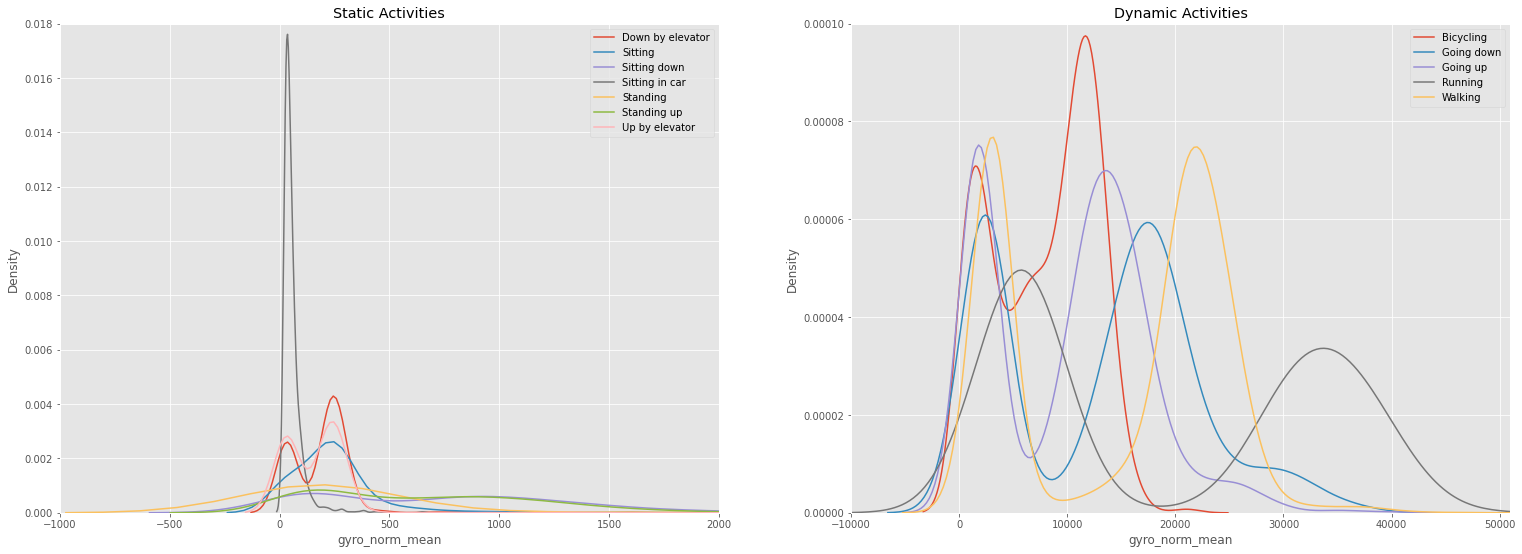

In [ ]:
plt.figure(figsize=(26,9))
plt.subplot(1,2,1)
plt.title("Static Activities")
sns.distplot(df[df["activity"]=="Down by elevator"]['gyro_norm_mean'], hist = False, label = 'Down by elevator')
sns.distplot(df[df["activity"]=="Sitting"]['gyro_norm_mean'], hist = False, label = 'Sitting')
sns.distplot(df[df["activity"]=="Sitting down"]['gyro_norm_mean'], hist = False, label = 'Sitting down')
sns.distplot(df[df["activity"]=="Sitting in car"]['gyro_norm_mean'], hist = False, label = 'Sitting in car')
sns.distplot(df[df["activity"]=="Standing"]['gyro_norm_mean'], hist = False, label = 'Standing')
sns.distplot(df[df["activity"]=="Standing up"]['gyro_norm_mean'], hist = False, label = 'Standing up')
sns.distplot(df[df["activity"]=="Up by elevator"]['gyro_norm_mean'], hist = False, label = 'Up by elevator')
plt.axis([-1000, 2000, 0, 0.0180])
plt.legend()
plt.subplot(1,2,2)
plt.title("Dynamic Activities")
sns.distplot(df[df["activity"]=="Bicycling"]['gyro_norm_mean'], hist = False, label = 'Bicycling')
sns.distplot(df[df["activity"]=="Going down"]['gyro_norm_mean'], hist = False, label = 'Going down')
sns.distplot(df[df["activity"]=="Going up"]['gyro_norm_mean'], hist = False, label = 'Going up')
sns.distplot(df[df["activity"]=="Running"]['gyro_norm_mean'], hist = False, label = 'Running')
sns.distplot(df[df["activity"]=="Walking"]['gyro_norm_mean'], hist = False, label = 'Walking')
plt.axis([-10000, 51000, 0, 0.0001])
plt.legend();

## Boxplot activity VS acceleration norm features

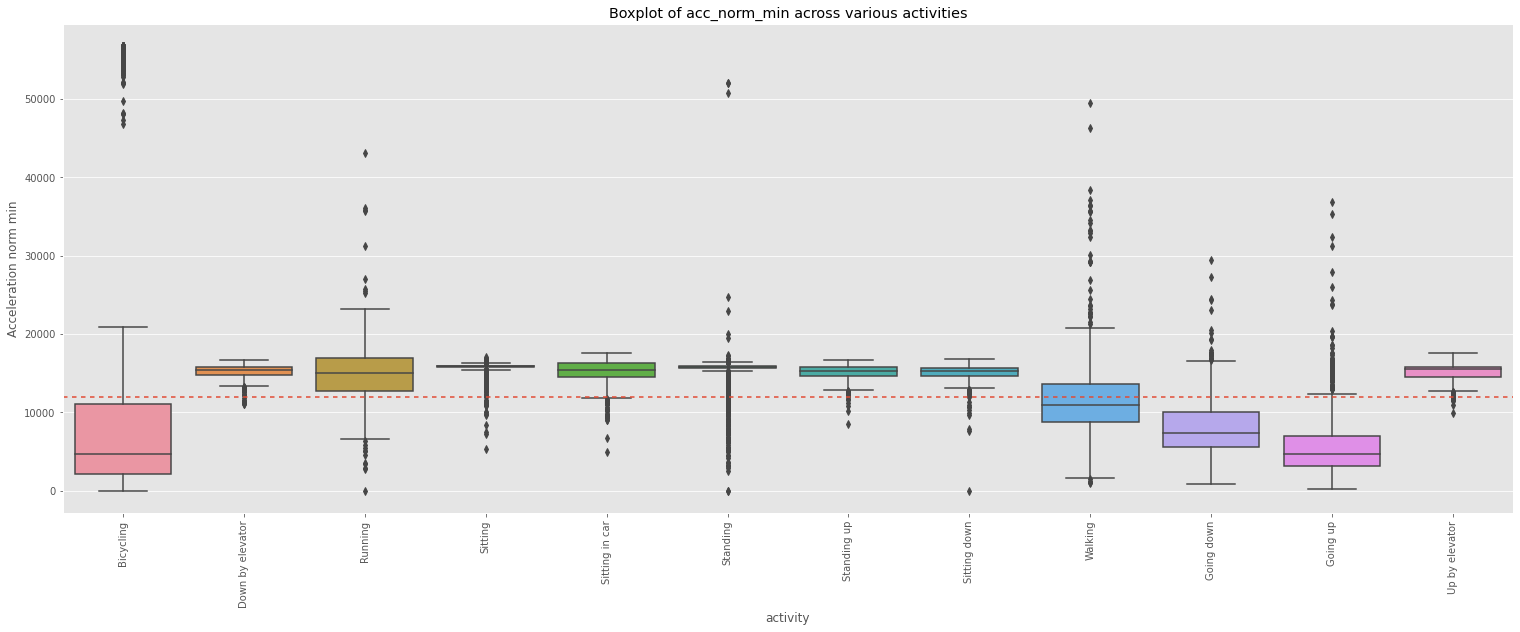

In [ ]:
plt.figure(figsize=(26,9))
sns.boxplot(x='activity', y='acc_norm_amin', data=df, showfliers=True)
plt.ylabel('Acceleration norm min')
plt.title("Boxplot of acc_norm_min across various activities")
plt.axhline(y=12000, xmin=0, dashes=(3,3))
plt.xticks(rotation=90);

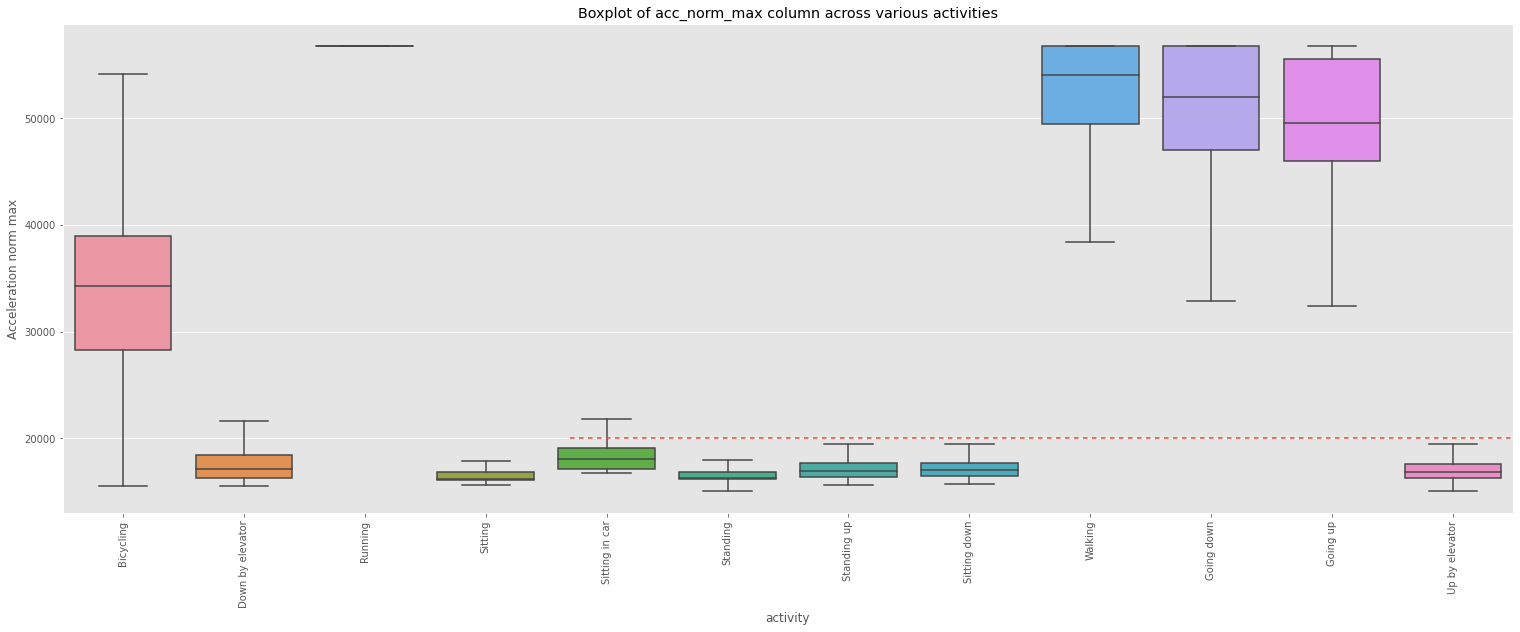

In [ ]:
plt.figure(figsize=(26,9))
sns.boxplot(x='activity', y='acc_norm_amax', data=df, showfliers=False)
plt.ylabel('Acceleration norm max')
plt.title("Boxplot of acc_norm_max column across various activities")
plt.axhline(y=20000, xmin=0.35, dashes=(3,3))
plt.xticks(rotation=90);

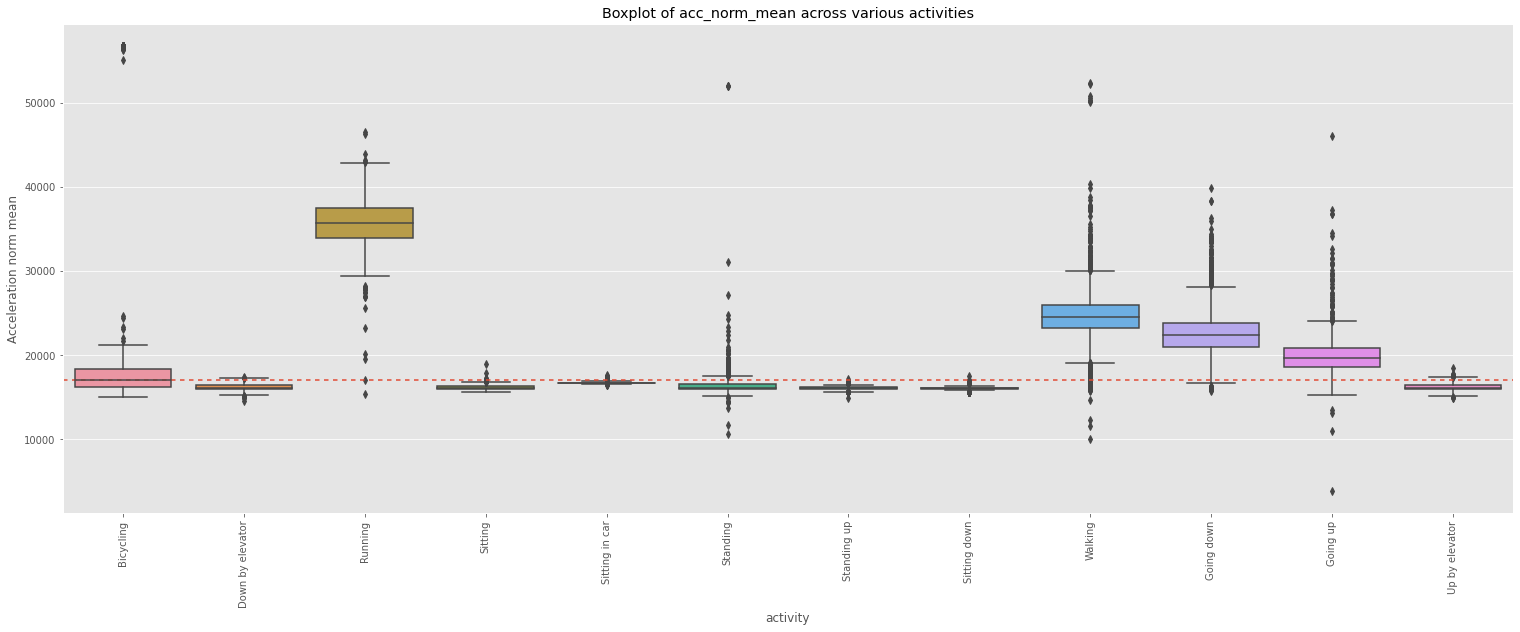

In [ ]:
plt.figure(figsize=(26,9))
sns.boxplot(x='activity', y='acc_norm_mean', data=df, showfliers=True)
plt.ylabel('Acceleration norm mean')
plt.title("Boxplot of acc_norm_mean across various activities")
plt.axhline(y=17000, xmin=0, dashes=(3,3))
plt.xticks(rotation=90);

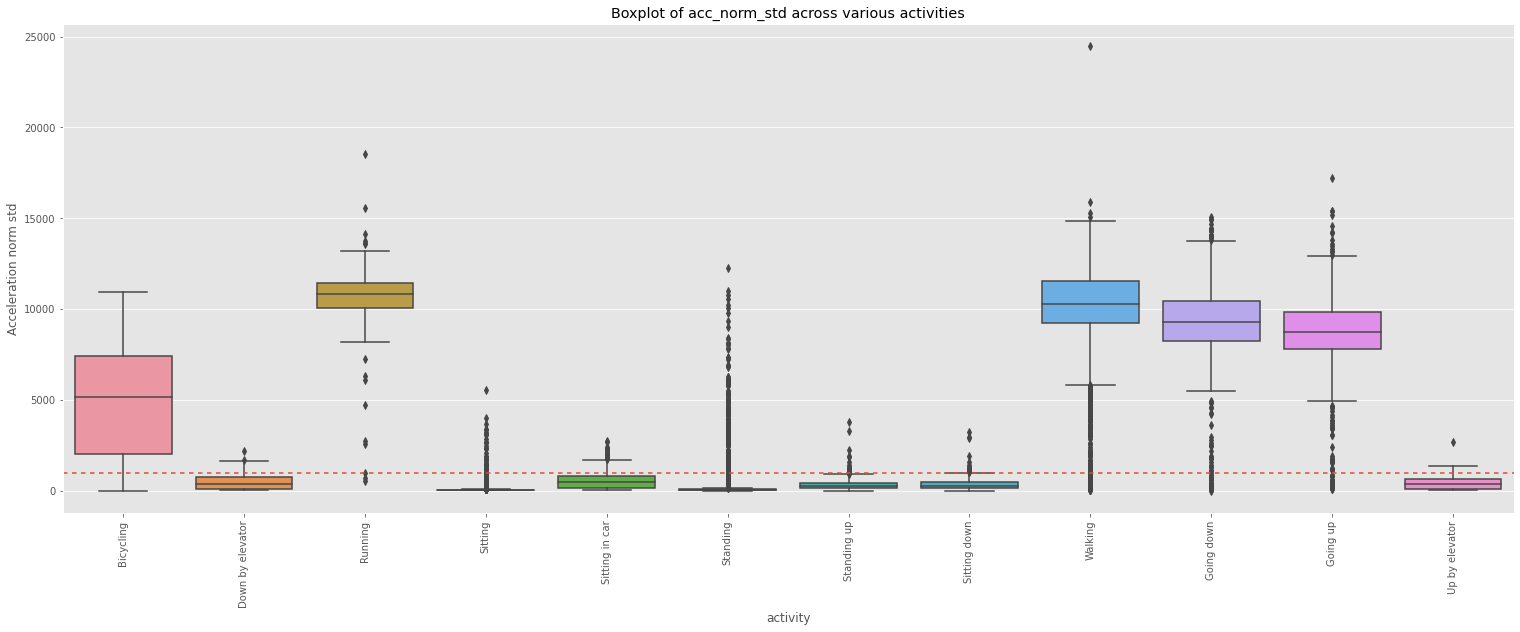

In [ ]:
plt.figure(figsize=(26,9))
sns.boxplot(x='activity', y='acc_norm_std', data=df, showfliers=True)
plt.ylabel('Acceleration norm std')
plt.title("Boxplot of acc_norm_std across various activities")
plt.axhline(y=1000, xmin=0, dashes=(3,3))
plt.xticks(rotation=90);

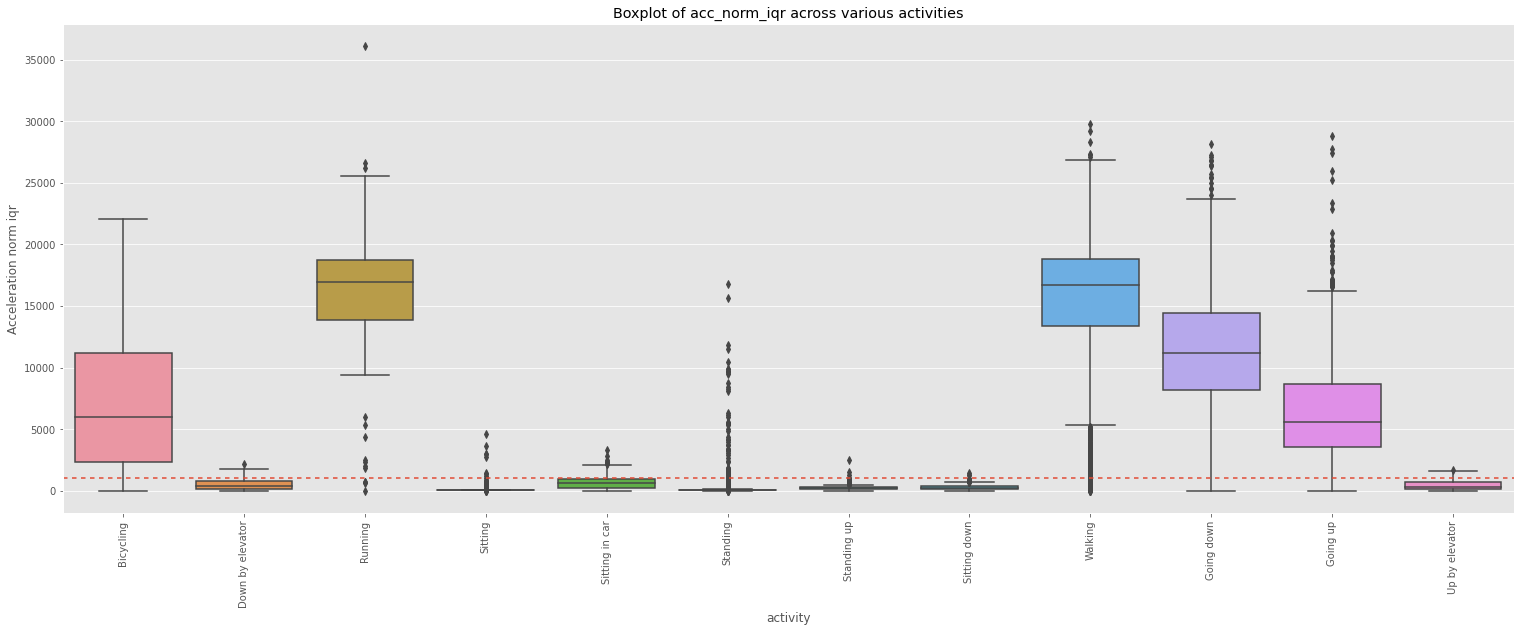

In [ ]:
plt.figure(figsize=(26,9))
sns.boxplot(x='activity', y='acc_norm_iqr', data=df, showfliers=True)
plt.ylabel('Acceleration norm iqr')
plt.title("Boxplot of acc_norm_iqr across various activities")
plt.axhline(y=1000, xmin=0, dashes=(3,3))
plt.xticks(rotation=90);

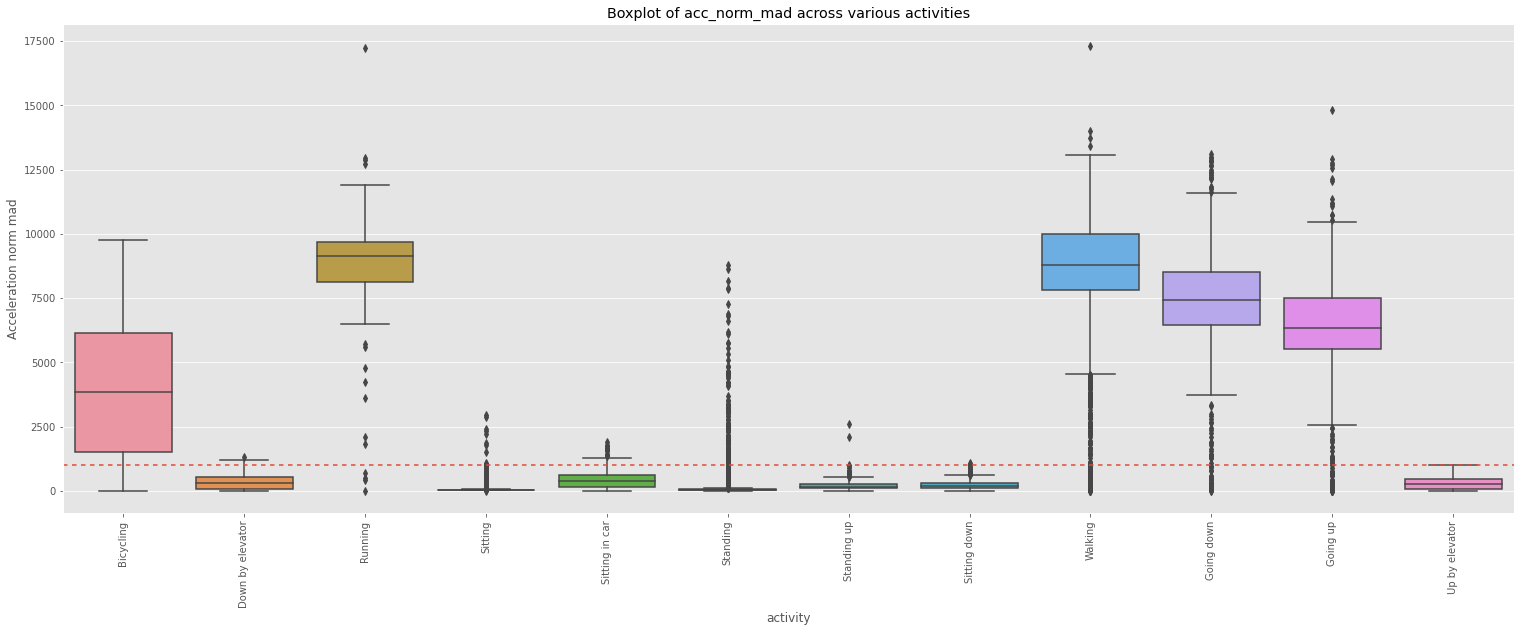

In [ ]:
plt.figure(figsize=(26,9))
sns.boxplot(x='activity', y='acc_norm_mad', data=df, showfliers=True)
plt.ylabel('Acceleration norm mad')
plt.title("Boxplot of acc_norm_mad across various activities")
plt.axhline(y=1000, xmin=0, dashes=(3,3))
plt.xticks(rotation=90);

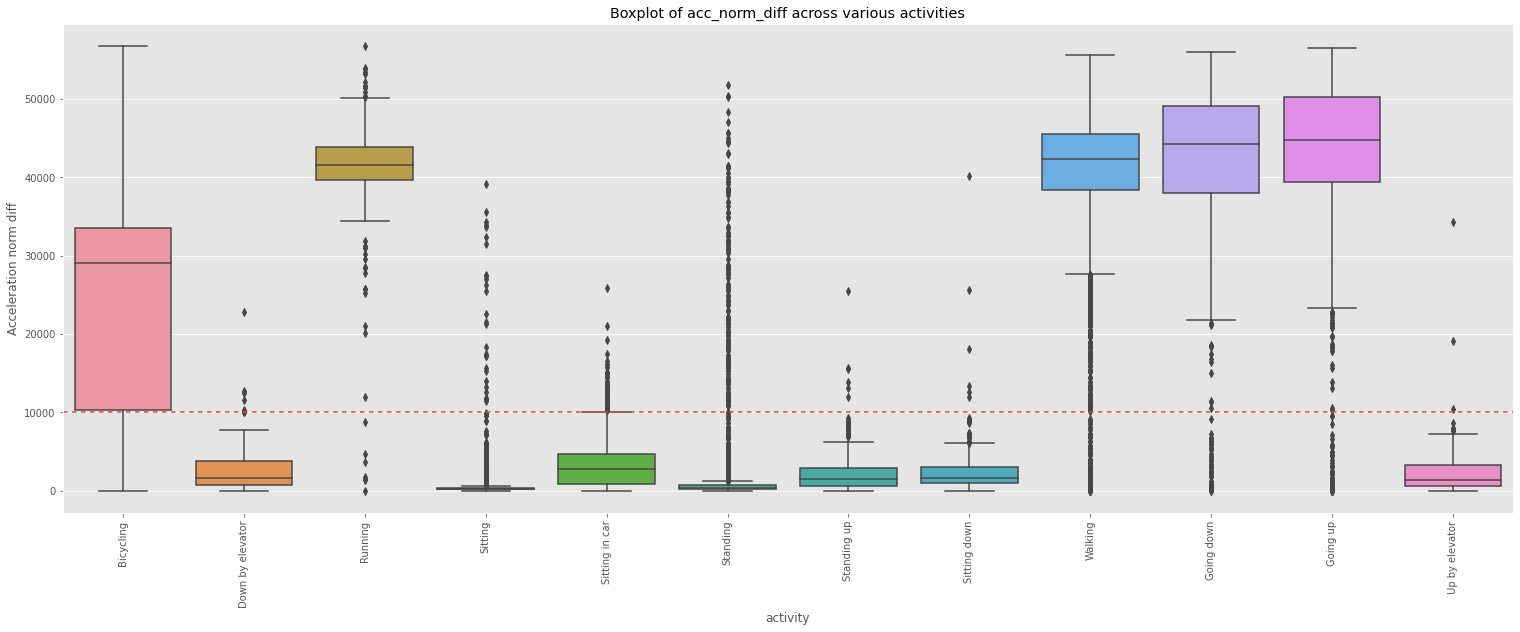

In [ ]:
plt.figure(figsize=(26,9))
sns.boxplot(x='activity', y='acc_norm_ran', data=df, showfliers=True)
plt.ylabel('Acceleration norm diff')
plt.title("Boxplot of acc_norm_diff across various activities")
plt.axhline(y=10000, xmin=0, dashes=(3,3))
plt.xticks(rotation=90);

## Boxplot activity VS gyrometer norm features

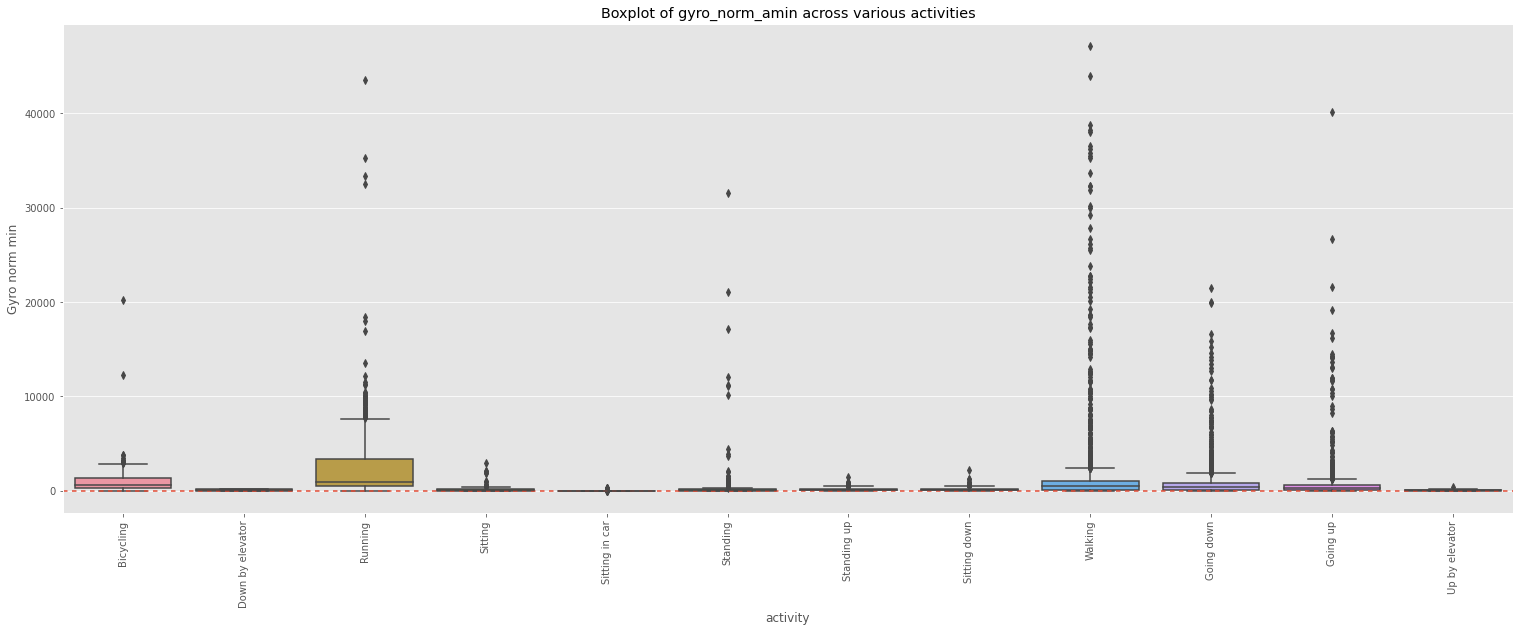

In [ ]:
plt.figure(figsize=(26,9))
sns.boxplot(x='activity', y='gyro_norm_amin', data=df, showfliers=True)
plt.ylabel('Gyro norm min')
plt.title("Boxplot of gyro_norm_amin across various activities")
plt.axhline(y=0.05, xmin=0, dashes=(3,3))
plt.xticks(rotation=90);

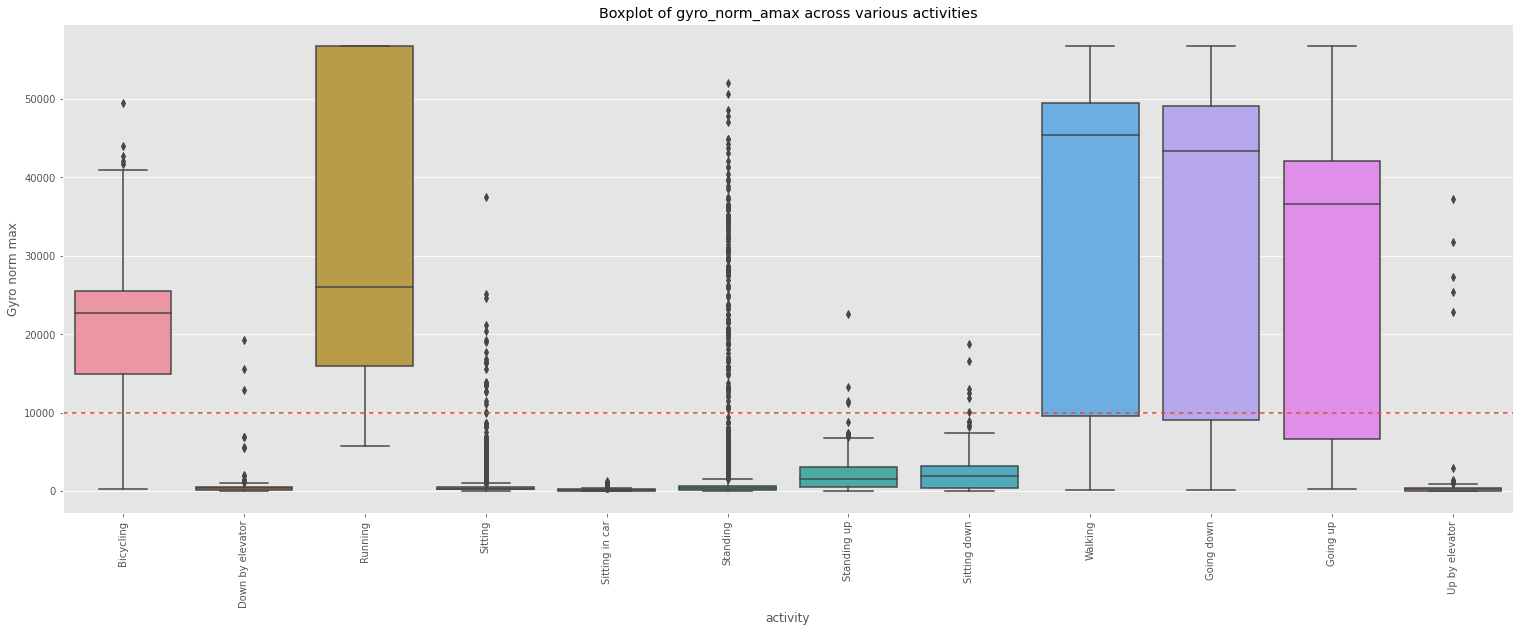

In [ ]:
plt.figure(figsize=(26,9))
sns.boxplot(x='activity', y='gyro_norm_amax', data=df, showfliers=True)
plt.ylabel('Gyro norm max')
plt.title("Boxplot of gyro_norm_amax across various activities")
plt.axhline(y=10000, xmin=0, dashes=(3,3))
plt.xticks(rotation=90);

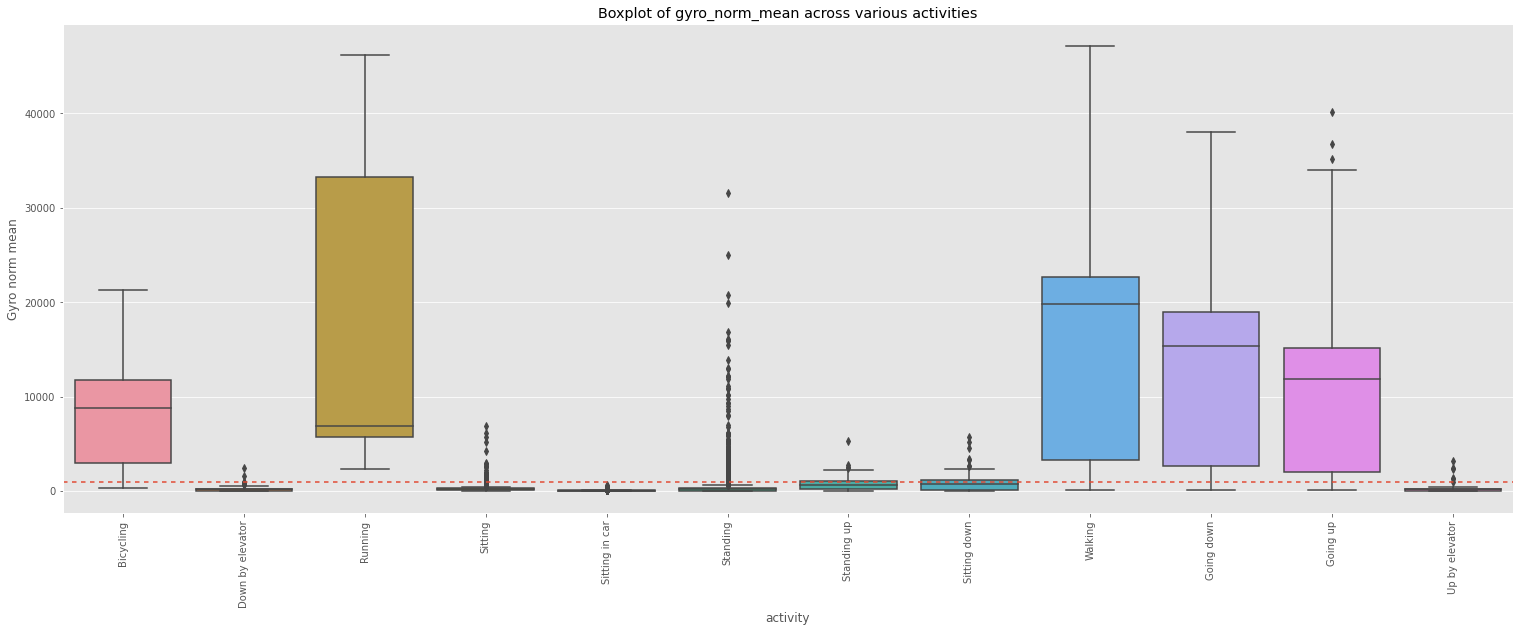

In [ ]:
plt.figure(figsize=(26,9))
sns.boxplot(x='activity', y='gyro_norm_mean', data=df, showfliers=True)
plt.ylabel('Gyro norm mean')
plt.title("Boxplot of gyro_norm_mean across various activities")
plt.axhline(y=1000, xmin=0, dashes=(3,3))
plt.xticks(rotation=90);

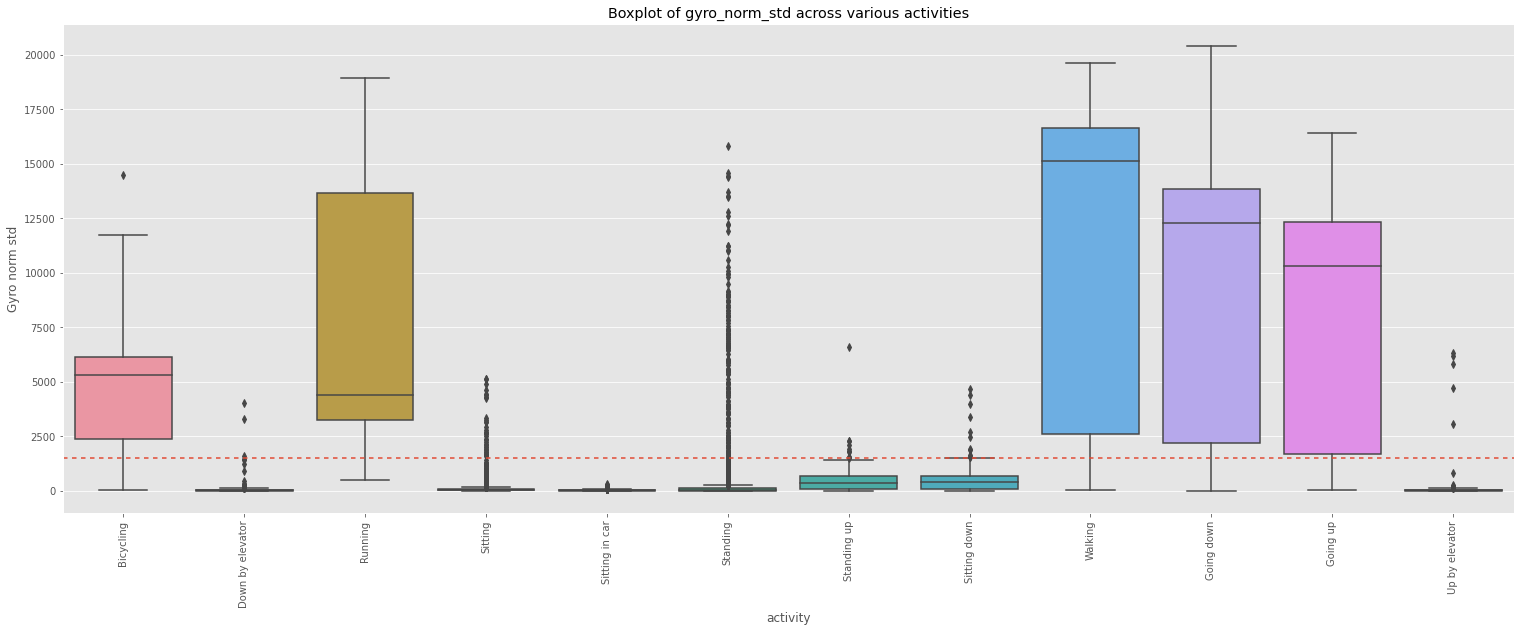

In [ ]:
plt.figure(figsize=(26,9))
sns.boxplot(x='activity', y='gyro_norm_std', data=df, showfliers=True)
plt.ylabel('Gyro norm std')
plt.title("Boxplot of gyro_norm_std across various activities")
plt.axhline(y=1500, xmin=0, dashes=(3,3))
plt.xticks(rotation=90);

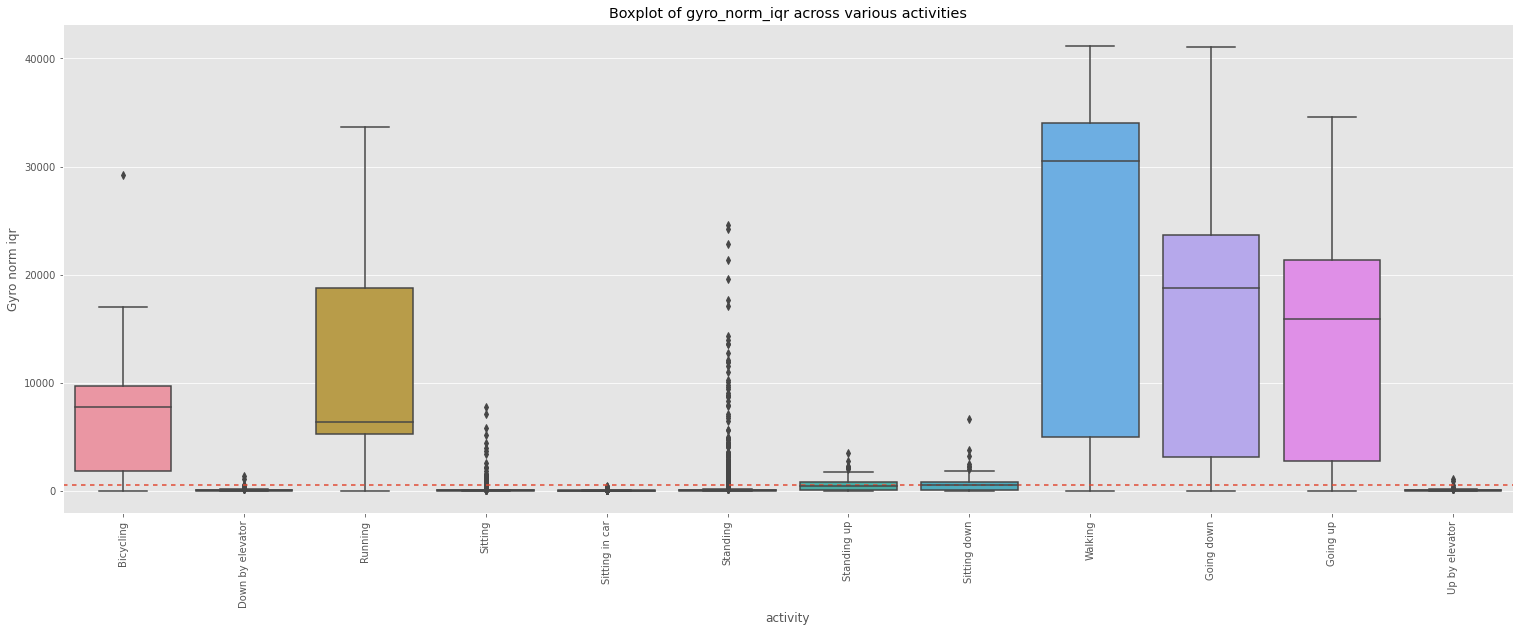

In [ ]:
plt.figure(figsize=(26,9))
sns.boxplot(x='activity', y='gyro_norm_iqr', data=df, showfliers=True)
plt.ylabel('Gyro norm iqr')
plt.title("Boxplot of gyro_norm_iqr across various activities")
plt.axhline(y=500, xmin=0, dashes=(3,3))
plt.xticks(rotation=90);

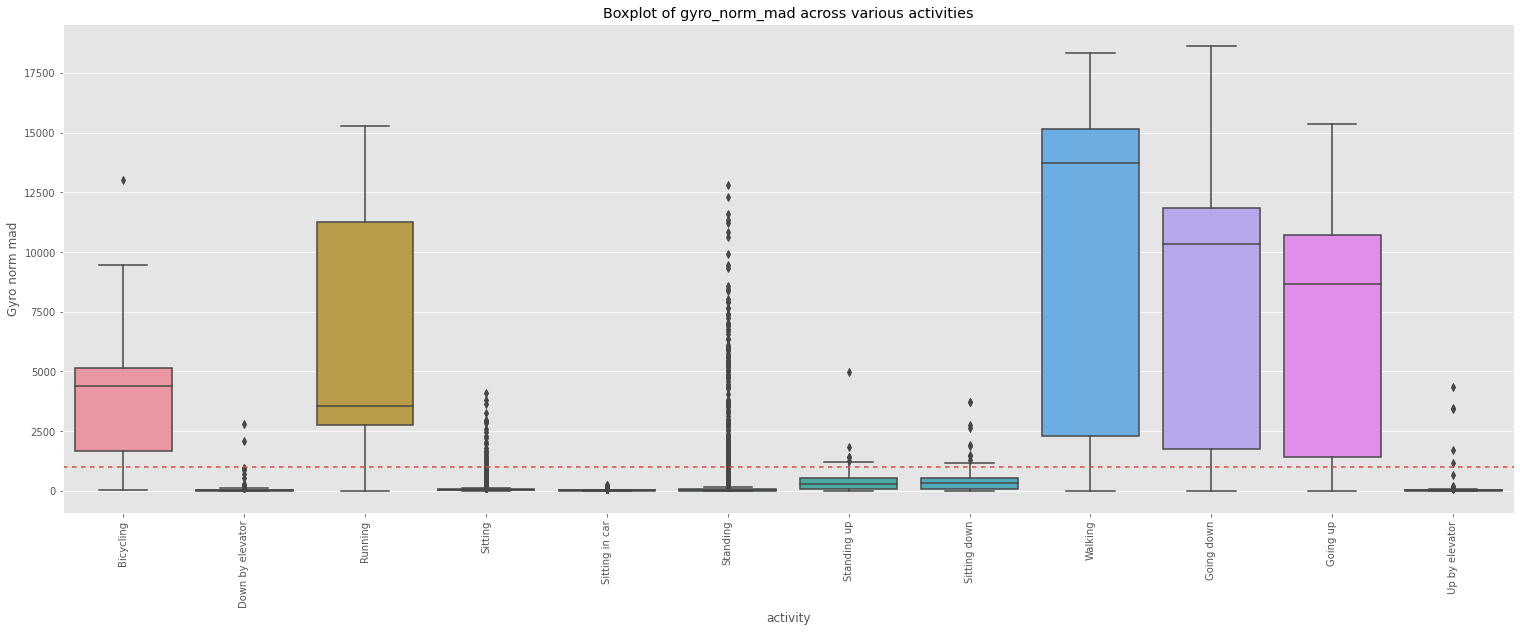

In [ ]:
plt.figure(figsize=(26,9))
sns.boxplot(x='activity', y='gyro_norm_mad', data=df, showfliers=True)
plt.ylabel('Gyro norm mad')
plt.title("Boxplot of gyro_norm_mad across various activities")
plt.axhline(y=1000, xmin=0, dashes=(3,3))
plt.xticks(rotation=90);

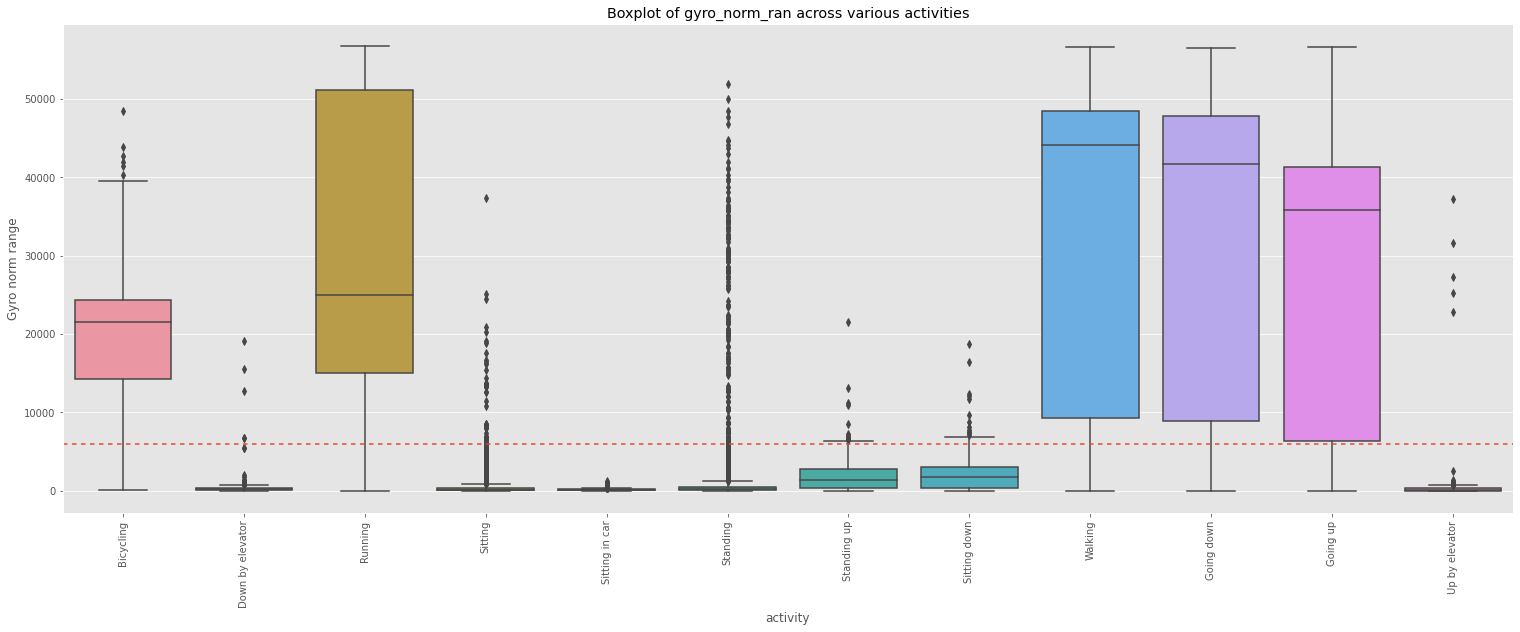

In [ ]:
plt.figure(figsize=(26,9))
sns.boxplot(x='activity', y='gyro_norm_ran', data=df, showfliers=True)
plt.ylabel('Gyro norm range')
plt.title("Boxplot of gyro_norm_ran across various activities")
plt.axhline(y=6000, xmin=0, dashes=(3,3))
plt.xticks(rotation=90);

# Save data in pickle format in google drive


In [ ]:
df.to_pickle("/tmp/df_3.pkl")

In [ ]:
!cp /tmp/df_3.pkl /content/drive/MyDrive/myproject/outputdata